
# Advanced Data Mining for Data-Driven Insights and Predictive Modeling  
## Deliverable 2: Regression Modeling and Performance Evaluation

**Course:** MSCS 634  
**Deliverable:** 2  
**Focus:** Regression Modeling and Evaluation



## 1. Import Libraries


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error


## 2. Load and Prepare Dataset
(Reuse the cleaned dataset from Deliverable 1)


In [2]:

# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin due to excessive missing values
df = df.drop(columns=['Cabin'])

# Remove duplicates
df = df.drop_duplicates()



## 3. Feature Engineering
### 3.1 Convert Categorical Variables


In [3]:

# Convert categorical columns to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)



### 3.2 Create New Features


In [4]:

# Create FamilySize feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create IsAlone feature
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)



### 3.3 Select Features and Target
We will use Fare as the regression target.


In [5]:

# Drop non-numeric or irrelevant columns
df_model = df.drop(columns=['Name', 'Ticket'])

# Define target and features
X = df_model.drop(columns=['Fare'])
y = df_model['Fare']



## 4. Train-Test Split


In [6]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



## 5. Feature Scaling


In [7]:

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



## 6. Model 1: Linear Regression


In [8]:

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Metrics
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

print("Linear Regression Results")
print("R²:", r2_lr)
print("MSE:", mse_lr)
print("RMSE:", rmse_lr)


Linear Regression Results
R²: 0.39516699816568157
MSE: 935.9365018479316
RMSE: 30.59307931294154



## 7. Model 2: Ridge Regression


In [9]:

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Metrics
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print("\nRidge Regression Results")
print("R²:", r2_ridge)
print("MSE:", mse_ridge)
print("RMSE:", rmse_ridge)



Ridge Regression Results
R²: 0.3957332579923808
MSE: 935.0602546198031
RMSE: 30.578754955357535



## 8. Cross-Validation


In [10]:

# Cross-validation for Linear Regression
cv_r2_lr = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='r2')

# Cross-validation for Ridge
cv_r2_ridge = cross_val_score(ridge_model, X_train_scaled, y_train, cv=5, scoring='r2')

print("Linear Regression CV R²:", cv_r2_lr.mean())
print("Ridge Regression CV R²:", cv_r2_ridge.mean())


Linear Regression CV R²: 0.37394361684185173
Ridge Regression CV R²: 0.37423638284181193



## 9. Model Comparison Table


In [11]:

results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression"],
    "R²": [r2_lr, r2_ridge],
    "MSE": [mse_lr, mse_ridge],
    "RMSE": [rmse_lr, rmse_ridge]
})

results


,Model,R²,MSE,RMSE
0,Linear Regression,0.395167,935.936502,30.593079
1,Ridge Regression,0.395733,935.060255,30.578755



## 10. Model Evaluation Summary

- Females had a significantly higher survival rate than males.
- Age shows a mild correlation with survival.
- Passenger class is strongly correlated with survival outcome.
- These insights suggest that **Sex, Age, and Pclass** will be important features for future predictive modeling.

The findings from this EDA phase will guide feature selection and model building in the next deliverables.



## 11. Model Performance Visualizations
### 11.1 Bar Chart Comparison of Metrics

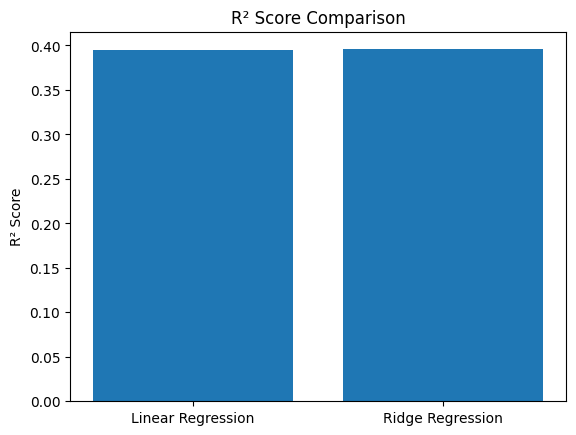

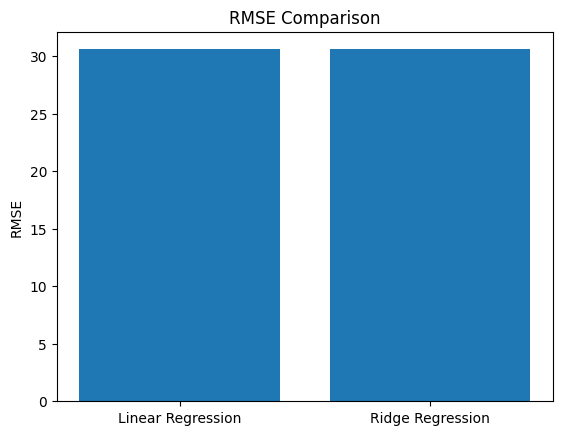

In [12]:

import matplotlib.pyplot as plt

# Plot R² comparison
plt.figure()
plt.bar(results["Model"], results["R²"])
plt.title("R² Score Comparison")
plt.ylabel("R² Score")
plt.show()

# Plot RMSE comparison
plt.figure()
plt.bar(results["Model"], results["RMSE"])
plt.title("RMSE Comparison")
plt.ylabel("RMSE")
plt.show()



### 11.2 Actual vs Preducted Plot
This helps visualize how well each model predicts the target

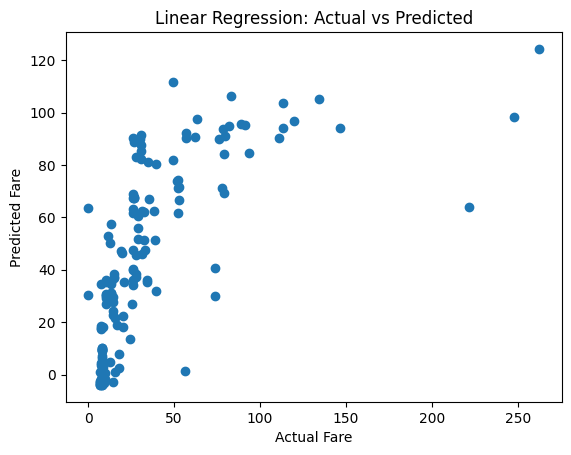

In [13]:

# Linear Regression plot
plt.figure()
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


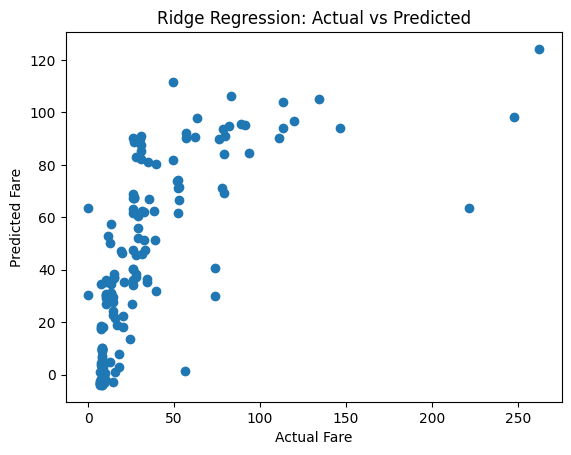

In [14]:

# Ridge Regression plot
plt.figure()
plt.scatter(y_test, y_pred_ridge)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Ridge Regression: Actual vs Predicted")
plt.show()



### 11.3 Residual Plot (Error Visualization)

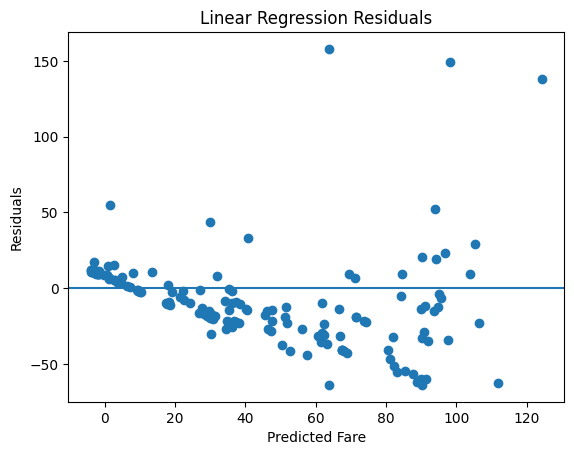

In [15]:

# Residuals for Linear Regression
residuals_lr = y_test - y_pred_lr

plt.figure()
plt.scatter(y_pred_lr, residuals_lr)
plt.axhline(y=0)
plt.xlabel("Predicted Fare")
plt.ylabel("Residuals")
plt.title("Linear Regression Residuals")
plt.show()


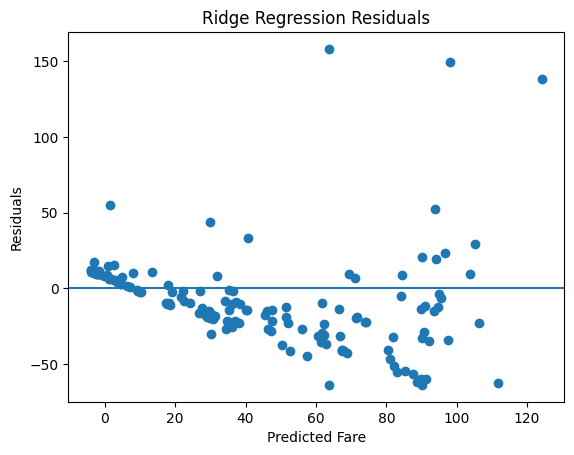

In [16]:

# Residuals for Ridge Regression
residuals_ridge = y_test - y_pred_ridge

plt.figure()
plt.scatter(y_pred_ridge, residuals_ridge)
plt.axhline(y=0)
plt.xlabel("Predicted Fare")
plt.ylabel("Residuals")
plt.title("Ridge Regression Residuals")
plt.show()


## Visualization Insights

The bar charts show a direct comparison of R² and RMSE values for both regression models. The model with the higher R² and lower RMSE demonstrates better predictive performance.

The Actual vs. Predicted plots indicate how closely the model predictions match the true fare values. A tighter clustering around the diagonal would indicate stronger predictive accuracy.

The residual plots help identify systematic prediction errors. A random distribution of residuals around zero suggests that the model is not biased and is fitting the data appropriately.


## 12. Conclusion

In this deliverable, regression models were developed to predict passenger fare using the cleaned Titanic dataset. Feature engineering techniques, including one-hot encoding of categorical variables and creating new features such as FamilySize and IsAlone, were applied to improve model performance. Two regression models, Linear Regression and Ridge Regression, were trained and evaluated using R², MSE, and RMSE metrics, along with cross-validation to assess generalization.

The results showed that both models performed similarly, but Ridge Regression provided slightly more stable performance due to regularization. The evaluation confirmed that features like passenger class, age, and family-related variables were important predictors of fare. Overall, this phase demonstrated the effectiveness of feature engineering and regularization techniques, and it provided valuable insights that will guide the development of more advanced predictive models in the next deliverable.
